# Application du modèle économétrique

Nous allons appliquer notre modèle translog aux différentes variables construites précédemment. 


In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm

## 1. Construction de la base nécessaire à l'application du modèle

On crée une base contenant la variable d'intérêt Y (les points ISA), les variables explicatives et les variables de contrôle.

In [5]:
VAR_EXPL = pd.read_csv('C:/Users/mille/OneDrive/Documents/GitHub/Hopitaux_Production/VAR_EXPL_CAT.csv')
VAR_EXPL_SPL = pd.read_csv('C:/Users/mille/OneDrive/Documents/ENSAE/2ème année/Stat App/VAR_EXPL_SPL.csv')
VAR_CTRL = pd.read_csv('C:/Users/mille/OneDrive/Documents/GitHub/Hopitaux_Production/Variables_controle.csv')
VAR_EXPL

,Unnamed: 0,Numero_finess,Médecins libéraux,Autres personnels médicaux libéraux,Médecins salariés,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,Points_ISA,stjr,Internes,Personnel médical,Personnel médical si LIB=0.1,Personnel médical si LIB=0.9
0,0,010007300,4.5,3.0,0.000,0.00,2.250000,4.200000,NaN,NaN,NaN,3785.960000,2,0.00,7.500,1.500,13.500
1,1,010008407,0.0,0.0,18.490,14.33,21.196667,97.323333,0.846667,9.206667,26.440,165054.798333,1,0.00,32.820,32.820,32.820
2,2,010009132,0.0,0.0,1.795,0.07,4.175000,46.700000,1.065000,1.130000,13.465,5715.170000,1,0.00,1.865,1.865,1.865
3,3,010780054,4.5,1.0,102.600,44.53,118.605000,388.590000,4.930000,107.660000,112.630,787929.068333,1,195.09,152.630,148.230,157.030
4,4,010780062,0.0,0.0,19.450,10.10,58.450000,336.540000,5.450000,29.320000,57.570,188174.950000,1,6.45,29.550,29.550,29.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1147,950300277,29.5,16.0,4.060,3.00,74.950000,246.990000,1.100000,6.460000,14.460,140779.191667,2,0.00,52.560,16.160,88.960
1148,1148,950300301,2.0,0.5,6.970,1.80,22.560000,103.560000,1.380000,2.940000,3.000,6779.931667,2,0.00,11.270,9.270,13.270
1149,1149,950300350,5.5,6.5,1.000,0.80,6.600000,27.550000,NaN,3.000000,1.000,11099.390000,2,0.00,13.800,4.200,23.400
1150,1150,950630012,0.0,0.0,11.300,2.50,23.070000,177.880000,39.070000,5.330000,12.700,20931.220000,3,2.49,13.800,13.800,13.800


In [6]:
del VAR_EXPL['Unnamed: 0']
del VAR_EXPL_SPL['Unnamed: 0']

In [7]:
VAR_EXPL.columns

Index(['Numero_finess', 'Médecins libéraux',
       'Autres personnels médicaux libéraux', 'Médecins salariés',
       'Autres personnels médicaux salariés',
       'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers',
       'Points_ISA', 'stjr', 'Internes', 'Personnel médical',
       'Personnel médical si LIB=0.1', 'Personnel médical si LIB=0.9'],
      dtype='object')

In [8]:
df = pd.merge(VAR_EXPL, VAR_CTRL, on=['Numero_finess'])
df.rename(columns = {'Points_ISA_x': 'Points_ISA', 'stjr_x': 'stjr'}, inplace=True)
df.drop(['Points_ISA_y','stjr_y'], axis=1, inplace=True)


In [9]:
df = pd.merge(df, VAR_EXPL_SPL)
df

,Numero_finess,Médecins libéraux,Autres personnels médicaux libéraux,Médecins salariés,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,...,Population,Dep Moyenne Salaires Horaires,Dep Moyenne Salaires Cadre Horaires,Dep Moyenne Salaires Prof Intermédiaire Horaires,Dep Moyenne Salaires Employé Horaires,Moyenne Revenus Fiscaux Départementaux,Bloc_politique,Autre sans internes,Autre sans direction et administratif,Autre sans techniques et ouvriers
0,010007300,4.5,3.0,0.000,0.00,2.250000,4.200000,NaN,NaN,NaN,...,4263.0,11.410345,21.963793,12.558621,8.743103,12509.0,Centre gauche à centre droit,NaN,NaN,NaN
1,010008407,0.0,0.0,18.490,14.33,21.196667,97.323333,0.846667,9.206667,26.440,...,24188.0,11.410345,21.963793,12.558621,8.743103,12509.0,Droite à extrême droite,57.690,36.493333,31.250
2,010009132,0.0,0.0,1.795,0.07,4.175000,46.700000,1.065000,1.130000,13.465,...,1485.0,11.410345,21.963793,12.558621,8.743103,12509.0,Droite à extrême droite,19.835,15.660000,6.370
3,010780054,4.5,1.0,102.600,44.53,118.605000,388.590000,4.930000,107.660000,112.630,...,5287.0,11.410345,21.963793,12.558621,8.743103,12509.0,Centre droit à droite,343.825,420.310000,426.285
4,010780062,0.0,0.0,19.450,10.10,58.450000,336.540000,5.450000,29.320000,57.570,...,8002.0,11.410345,21.963793,12.558621,8.743103,12509.0,Centre gauche à centre droit,150.790,98.790000,99.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,950300277,29.5,16.0,4.060,3.00,74.950000,246.990000,1.100000,6.460000,14.460,...,57851.0,13.710526,22.919737,13.531579,9.663158,8826.0,Extrême gauche à gauche,96.970,22.020000,82.510
1146,950300301,2.0,0.5,6.970,1.80,22.560000,103.560000,1.380000,2.940000,3.000,...,19653.0,13.710526,22.919737,13.531579,9.663158,8826.0,Extrême gauche à gauche,29.880,7.320000,26.880
1147,950300350,5.5,6.5,1.000,0.80,6.600000,27.550000,NaN,3.000000,1.000,...,19645.0,13.710526,22.919737,13.531579,9.663158,8826.0,Centre gauche à centre droit,NaN,NaN,NaN
1148,950630012,0.0,0.0,11.300,2.50,23.070000,177.880000,39.070000,5.330000,12.700,...,2585.0,13.710526,22.919737,13.531579,9.663158,8826.0,Centre gauche à centre droit,80.170,59.590000,69.960


On obtient bien 1152 établissements (inchallah), le nombre d'établissements qui avaient des données dans les bases du personnel. On n'a donc pas pris en compte les établissements présents dans la base des variables explicatives mais dont on ne pouvait rien dire, faute de données sur leur personnel.  

On construit des variables plus générales pour nos premières analyses : on regroupe les différentes mesures des ressources techniques des hôpitaux dans la variable Capital_Tech et les différents types de personnels libéraux et salariés dans les mêmes catégorie.

In [10]:
df = df.assign(Capital_tech = df['Capital_Bloc'] + df['Capital_imagerie'] + df['Capital_Examens_biologiques'] 
               + df['Capital_telemed'], 
              Médecins = df['Médecins libéraux'] + df['Médecins salariés'],
              Autres_personnels_médicaux = df['Autres personnels médicaux libéraux'] +df['Autres personnels médicaux salariés'])
df

,Numero_finess,Médecins libéraux,Autres personnels médicaux libéraux,Médecins salariés,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,...,Dep Moyenne Salaires Prof Intermédiaire Horaires,Dep Moyenne Salaires Employé Horaires,Moyenne Revenus Fiscaux Départementaux,Bloc_politique,Autre sans internes,Autre sans direction et administratif,Autre sans techniques et ouvriers,Capital_tech,Médecins,Autres_personnels_médicaux
0,010007300,4.5,3.0,0.000,0.00,2.250000,4.200000,NaN,NaN,NaN,...,12.558621,8.743103,12509.0,Centre gauche à centre droit,NaN,NaN,NaN,1.0,4.500,3.00
1,010008407,0.0,0.0,18.490,14.33,21.196667,97.323333,0.846667,9.206667,26.440,...,12.558621,8.743103,12509.0,Droite à extrême droite,57.690,36.493333,31.250,265754.0,18.490,14.33
2,010009132,0.0,0.0,1.795,0.07,4.175000,46.700000,1.065000,1.130000,13.465,...,12.558621,8.743103,12509.0,Droite à extrême droite,19.835,15.660000,6.370,0.0,1.795,0.07
3,010780054,4.5,1.0,102.600,44.53,118.605000,388.590000,4.930000,107.660000,112.630,...,12.558621,8.743103,12509.0,Centre droit à droite,343.825,420.310000,426.285,954720.0,107.100,45.53
4,010780062,0.0,0.0,19.450,10.10,58.450000,336.540000,5.450000,29.320000,57.570,...,12.558621,8.743103,12509.0,Centre gauche à centre droit,150.790,98.790000,99.670,8.0,19.450,10.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,950300277,29.5,16.0,4.060,3.00,74.950000,246.990000,1.100000,6.460000,14.460,...,13.531579,9.663158,8826.0,Extrême gauche à gauche,96.970,22.020000,82.510,8.0,33.560,19.00
1146,950300301,2.0,0.5,6.970,1.80,22.560000,103.560000,1.380000,2.940000,3.000,...,13.531579,9.663158,8826.0,Extrême gauche à gauche,29.880,7.320000,26.880,0.0,8.970,2.30
1147,950300350,5.5,6.5,1.000,0.80,6.600000,27.550000,NaN,3.000000,1.000,...,13.531579,9.663158,8826.0,Centre gauche à centre droit,NaN,NaN,NaN,7.0,6.500,7.30
1148,950630012,0.0,0.0,11.300,2.50,23.070000,177.880000,39.070000,5.330000,12.700,...,13.531579,9.663158,8826.0,Centre gauche à centre droit,80.170,59.590000,69.960,0.0,11.300,2.50


Nous décidons de traiter les valeurs manquantes en les remplaçant par des valeurs nulles. Nous montrerons plus tard que cela n'affecte pas nos résultats.

In [11]:
df_nanull = df.fillna(0)

In [12]:
df.columns

Index(['Numero_finess', 'Médecins libéraux',
       'Autres personnels médicaux libéraux', 'Médecins salariés',
       'Autres personnels médicaux salariés',
       'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers',
       'Points_ISA', 'stjr', 'Internes', 'Personnel médical',
       'Personnel médical si LIB=0.1', 'Personnel médical si LIB=0.9', 'dep',
       'Departement', 'COMINSEE', 'Capital_Lit_MCO', 'Capital_Bloc',
       'Capital_imagerie', 'Capital_Examens_biologiques', 'Capital_telemed',
       'SEJHC_MED', 'SEJHC_CHI', 'SEJHC_OBS', 'SEJHC_MCO',
       'Taux_chomage_par_dep', 'Population', 'Dep Moyenne Salaires Horaires',
       'Dep Moyenne Salaires Cadre Horaires',
       'Dep Moyenne Salaires Prof Intermédiaire Horaires',
       'Dep Moyenne Salaires Employé Horaires',
       'Moyenne Revenus Fiscaux Départementaux', 'Bloc_polit

In [20]:
#Nous passons en log tous les variables que l'on va utiliser comme facteur de production dans notre fonction translog

df_log = df_nanull.apply(lambda x: np.log(x) if x.name in ['Médecins libéraux', 'Autres personnels médicaux libéraux', 
                                                    'Médecins salariés', 'Autres personnels médicaux salariés',
                                                    'Médecins', 'Autres_personnels_médicaux',      
                                                    'Personnels de direction et administratifs',
                                                    'Personnels des services de soins', 'Personnels éducatifs et sociaux',
                                                    'Personnels médico-techniques', 'Personnels techniques et ouvriers',
                                                    'Personnel médical', 'Autre sans internes',
                                                    'Autre sans direction et administratif',
                                                    'Autre sans techniques et ouvriers',
                                                    'Points_ISA', 'Internes', 'Capital_Lit_MCO',
                                                    'Capital_Bloc', 'Capital_imagerie', 'Capital_Examens_biologiques',
                                                    'Capital_telemed', 'Capital_tech', 'Population'] else x)

#On remplace les valeurs -infini apparues après l'application du log par la valeur -3 c'est-à-dire log(0.001)
from numpy import inf
df_log = df_log.replace(-inf, -3)

df_log

C:\Users\mille\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Numero_finess,Médecins libéraux,Autres personnels médicaux libéraux,Médecins salariés,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,...,Dep Moyenne Salaires Prof Intermédiaire Horaires,Dep Moyenne Salaires Employé Horaires,Moyenne Revenus Fiscaux Départementaux,Bloc_politique,Autre sans internes,Autre sans direction et administratif,Autre sans techniques et ouvriers,Capital_tech,Médecins,Autres_personnels_médicaux
0,010007300,1.504077,1.098612,-3.000000,-3.000000,0.810930,1.435085,-3.000000,-3.000000,-3.000000,...,12.558621,8.743103,12509.0,Centre gauche à centre droit,-3.000000,-3.000000,-3.000000,0.000000,1.504077,1.098612
1,010008407,-3.000000,-3.000000,2.917230,2.662355,3.053844,4.578039,-0.166448,2.219928,3.274878,...,12.558621,8.743103,12509.0,Droite à extrême droite,4.055084,3.597130,3.442019,12.490326,2.917230,2.662355
2,010009132,-3.000000,-3.000000,0.585005,-2.659260,1.429114,3.843744,0.062975,0.122218,2.600094,...,12.558621,8.743103,12509.0,Droite à extrême droite,2.987448,2.751110,1.851599,-3.000000,0.585005,-2.659260
3,010780054,1.504077,0.000000,4.630838,3.796163,4.775799,5.962525,1.595339,4.678978,4.724108,...,12.558621,8.743103,12509.0,Centre droit à droite,5.840133,6.040993,6.055108,13.769173,4.673763,3.818371
4,010780062,-3.000000,-3.000000,2.967847,2.312535,4.068172,5.818717,1.695616,3.378270,4.053002,...,12.558621,8.743103,12509.0,Centre gauche à centre droit,5.015888,4.592996,4.601865,2.079442,2.967847,2.312535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,950300277,3.384390,2.772589,1.401183,1.098612,4.316821,5.509348,0.095310,1.865629,2.671386,...,13.531579,9.663158,8826.0,Extrême gauche à gauche,4.574402,3.091951,4.412919,2.079442,3.513335,2.944439
1146,950300301,0.693147,-0.693147,1.941615,0.587787,3.116178,4.640151,0.322083,1.078410,1.098612,...,13.531579,9.663158,8826.0,Extrême gauche à gauche,3.397189,1.990610,3.291383,-3.000000,2.193886,0.832909
1147,950300350,1.704748,1.871802,0.000000,-0.223144,1.887070,3.316003,-3.000000,1.098612,0.000000,...,13.531579,9.663158,8826.0,Centre gauche à centre droit,-3.000000,-3.000000,-3.000000,1.945910,1.871802,1.987874
1148,950630012,-3.000000,-3.000000,2.424803,0.916291,3.138533,5.181109,3.665355,1.673351,2.541602,...,13.531579,9.663158,8826.0,Centre gauche à centre droit,4.384149,4.087488,4.247924,-3.000000,2.424803,0.916291


In [46]:
dfm = df_log.copy()
for i in ['Personnel médical', 'Autre sans internes',
            'Autre sans direction et administratif',
            'Autre sans techniques et ouvriers',
            'Personnels de direction et administratifs',
            'Personnels des services de soins',
            'Personnels techniques et ouvriers',
            'Internes', 'Capital_Lit_MCO','Capital_tech',
             'Capital_Bloc', 'Capital_imagerie', 'Capital_Examens_biologiques']:
    for j in ['Personnel médical', 'Autre sans internes',
            'Autre sans direction et administratif',
            'Autre sans techniques et ouvriers',
            'Personnels de direction et administratifs',
            'Personnels des services de soins',
            'Personnels techniques et ouvriers',
            'Internes', 'Capital_Lit_MCO','Capital_tech',
            'Capital_Bloc', 'Capital_imagerie', 'Capital_Examens_biologiques']:
        if i >= j :
            dfm.insert(0, i + ' x ' + j, df_log[i]*df_log[j])
    
dfm

,Capital_Examens_biologiques x Capital_Examens_biologiques,Capital_Examens_biologiques x Capital_Bloc,Capital_Examens_biologiques x Autre sans techniques et ouvriers,Capital_Examens_biologiques x Autre sans direction et administratif,Capital_Examens_biologiques x Autre sans internes,Capital_imagerie x Capital_Examens_biologiques,Capital_imagerie x Capital_imagerie,Capital_imagerie x Capital_Bloc,Capital_imagerie x Capital_Lit_MCO,Capital_imagerie x Autre sans techniques et ouvriers,...,Dep Moyenne Salaires Prof Intermédiaire Horaires,Dep Moyenne Salaires Employé Horaires,Moyenne Revenus Fiscaux Départementaux,Bloc_politique,Autre sans internes,Autre sans direction et administratif,Autre sans techniques et ouvriers,Capital_tech,Médecins,Autres_personnels_médicaux
0,9.000000,-0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,-0.000000,9.000000,9.000000,...,12.558621,8.743103,12509.0,Centre gauche à centre droit,-3.000000,-3.000000,-3.000000,0.000000,1.504077,1.098612
1,156.007124,24.304965,42.991790,44.929160,50.649138,20.102332,2.590290,3.131822,7.443607,5.539716,...,12.558621,8.743103,12509.0,Droite à extrême droite,4.055084,3.597130,3.442019,12.490326,2.917230,2.662355
2,9.000000,9.000000,-5.554798,-8.253329,-8.962344,9.000000,9.000000,9.000000,-6.907755,-5.554798,...,12.558621,8.743103,12509.0,Droite à extrême droite,2.987448,2.751110,1.851599,-3.000000,0.585005,-2.659260
3,189.589443,34.215048,83.373682,83.179322,80.413654,31.704635,5.301898,5.721709,13.610112,13.942402,...,12.558621,8.743103,12509.0,Centre droit à droite,5.840133,6.040993,6.055108,13.769173,4.673763,3.818371
4,9.000000,-4.158883,-13.805594,-13.778989,-15.047664,-4.158883,1.921812,1.921812,6.283517,6.379539,...,12.558621,8.743103,12509.0,Centre gauche à centre droit,5.015888,4.592996,4.601865,2.079442,2.967847,2.312535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,9.000000,-6.238325,-13.238758,-9.275853,-13.723205,9.000000,9.000000,-6.238325,-14.648406,-13.238758,...,13.531579,9.663158,8826.0,Extrême gauche à gauche,4.574402,3.091951,4.412919,2.079442,3.513335,2.944439
1146,9.000000,9.000000,-9.874148,-5.971831,-10.191568,9.000000,9.000000,9.000000,-9.133567,-9.874148,...,13.531579,9.663158,8826.0,Extrême gauche à gauche,3.397189,1.990610,3.291383,-3.000000,2.193886,0.832909
1147,9.000000,-4.158883,9.000000,9.000000,9.000000,-3.295837,1.206949,1.523000,3.491449,-3.295837,...,13.531579,9.663158,8826.0,Centre gauche à centre droit,-3.000000,-3.000000,-3.000000,1.945910,1.871802,1.987874
1148,9.000000,9.000000,-12.743771,-12.262463,-13.152448,9.000000,9.000000,9.000000,-4.828314,-12.743771,...,13.531579,9.663158,8826.0,Centre gauche à centre droit,4.384149,4.087488,4.247924,-3.000000,2.424803,0.916291


In [22]:
dfm.columns[:30]

Index(['Capital_Examens_biologiques x Capital_Examens_biologiques',
       'Capital_Examens_biologiques x Capital_Bloc',
       'Capital_Examens_biologiques x Autre sans techniques et ouvriers',
       'Capital_Examens_biologiques x Autre sans direction et administratif',
       'Capital_Examens_biologiques x Autre sans internes',
       'Capital_imagerie x Capital_Examens_biologiques',
       'Capital_imagerie x Capital_imagerie',
       'Capital_imagerie x Capital_Bloc', 'Capital_imagerie x Capital_Lit_MCO',
       'Capital_imagerie x Autre sans techniques et ouvriers',
       'Capital_imagerie x Autre sans direction et administratif',
       'Capital_imagerie x Autre sans internes', 'Capital_Bloc x Capital_Bloc',
       'Capital_Bloc x Autre sans techniques et ouvriers',
       'Capital_Bloc x Autre sans direction et administratif',
       'Capital_Bloc x Autre sans internes',
       'Capital_tech x Capital_Examens_biologiques',
       'Capital_tech x Capital_imagerie', 'Capital_tec

## 2. Justification du modèle choisi

### 2.1 Le passage au log

On commence par vérifier que nos variables principales sont corrélées avec Y (la production en points ISA) log-linéairement plutôt que linéairement. On prend pour exemples trois facteurs de production essentielles : les médecins, le personnel de service de soins (notamment infirmier.ère.s) et le nombre de lits en MCO. 

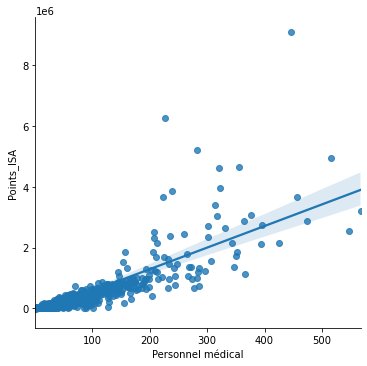

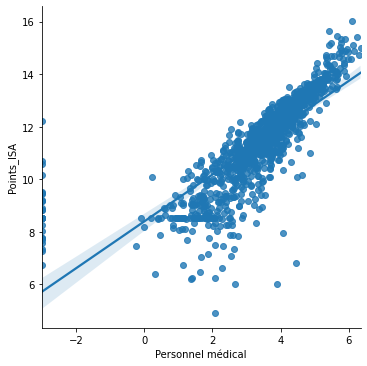

In [23]:

#Pour les médecins salariés, on enlève les valeurs nulles (transformé en log, ce sont les -infini que l'on a recodé en -3) 
# sinon elles baissent artificiellement la droite de régression et rend les graphes moins lisibles

#index_null = df[ df['Personnel Médical'] == 0 ].index
#index_null_log = df_log[ df_log['Personnel Médical'] == -3 ].index

#df_nnull = df.drop(index_null)
#df_log_nnull = df_log.drop(index_null_log)

sns.lmplot(x = 'Personnel médical', y = 'Points_ISA', data = df)
sns.lmplot(x = 'Personnel médical', y = 'Points_ISA', data = df_log)


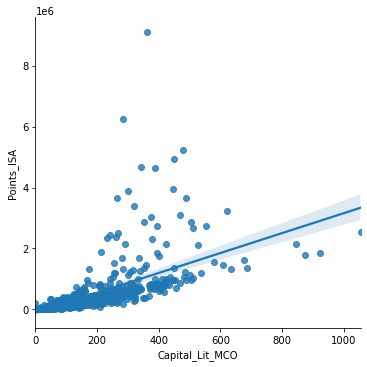

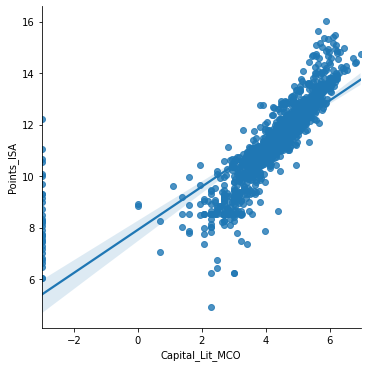

In [24]:
sns.lmplot(x = 'Capital_Lit_MCO', y = 'Points_ISA', data = df)
sns.lmplot(x = 'Capital_Lit_MCO', y = 'Points_ISA', data = df_log)

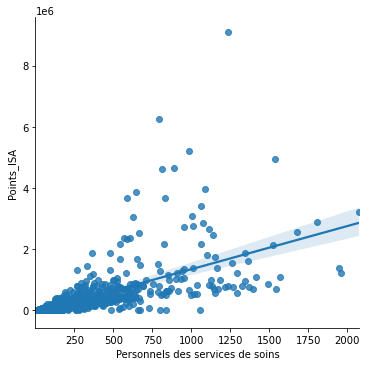

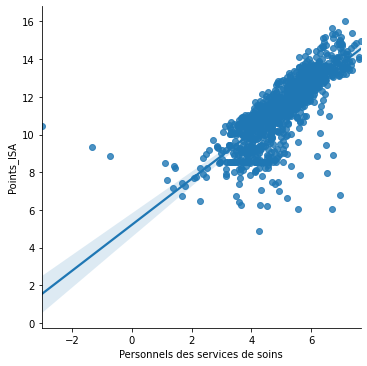

In [25]:
sns.lmplot(x = 'Personnels des services de soins', y = 'Points_ISA', data = df)
sns.lmplot(x = 'Personnels des services de soins', y = 'Points_ISA', data = df_log)

Ces représentations graphiques et régressions montrent bien la pertinence du modèle translog puisque nos variables sont bien plus corrélées log-linéairement que linéairement (avec des coefficients positifs). Cela montre bien que la productivité marginale de chaque facteur de production est positive et décroissante. 

### 2.2 Comparaison entre un modèle de type Cobb-Douglas et un modèle translog

#### Premiers résultats généraux : 

In [26]:
X = dfm[['Personnel médical', 'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers', 'Internes',  
        'Capital_Lit_MCO', 'Capital_imagerie', 'Capital_Bloc', 'Capital_Examens_biologiques', 'Population']]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm['Points_ISA']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     621.5
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        14:50:18   Log-Likelihood:                -1112.7
No. Observations:                1150   AIC:                             2251.
Df Residuals:                    1137   BIC:                             2317.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

On obtient des coefficients en grande majorité significatifs à 5%, on peut donc les interpréter. 

ATTENTION c'est une régression log-log donc les coefficients s'interprètent comme des % : 1% de Xi en plus augmente de beta(Xi)% la production.

On constate qu'avec autant de variables, le modèle translog n'est pas pertinent, les p-values élevées montrent que beaucoup de coefficients ne sont pas significatifs. On garde donc pour le moment le modèle simple.
On souhaite à présent comparer ces variables entre les hôpitaux privés, publics et privés à but non lucratif. 

In [27]:
# 1 public 2 privé lucratif 3 privé non lucratif

index_non_public = dfm[ dfm['stjr'] != 1].index
index_non_privé = dfm[ dfm['stjr'] != 2].index
index_non_pnl = dfm[ dfm['stjr'] != 3].index

dfm_public = dfm.drop(index_non_public)
dfm_privé = dfm.drop(index_non_privé)
dfm_pnl = dfm.drop(index_non_pnl)

In [28]:
print("Nombre d'hôpitaux publics : ", dfm_public['stjr'].count())
print("Nombre d'hôpitaux privés : ", dfm_privé['stjr'].count())
print("Nombre d'hôpitaux privés à but non lucratif : ", dfm_pnl['stjr'].count())

Nombre d'hôpitaux publics :  517
Nombre d'hôpitaux privés :  461
Nombre d'hôpitaux privés à but non lucratif :  172


In [29]:
# Régression sur les hôpitaux publics : 

X = dfm_public[['Personnel médical', 'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers', 'Internes', 
        'Capital_Lit_MCO', 'Capital_imagerie', 'Capital_Bloc', 'Capital_Examens_biologiques', 'Population']]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm_public['Points_ISA']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     525.1
Date:                Fri, 14 May 2021   Prob (F-statistic):          8.30e-276
Time:                        14:51:07   Log-Likelihood:                -428.46
No. Observations:                 517   AIC:                             882.9
Df Residuals:                     504   BIC:                             938.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [30]:
# Régression sur les hôpitaux privés

X = dfm_privé[['Personnel médical', 'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers', 'Internes', 
        'Capital_Lit_MCO', 'Capital_imagerie', 'Capital_Bloc', 'Capital_Examens_biologiques', 'Population']]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm_privé['Points_ISA']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     165.1
Date:                Fri, 14 May 2021   Prob (F-statistic):          6.63e-156
Time:                        14:51:14   Log-Likelihood:                -365.52
No. Observations:                 461   AIC:                             757.0
Df Residuals:                     448   BIC:                             810.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [31]:
# Régression sur les hôpitaux privés à but non lucratif

X = dfm_pnl[['Personnel médical', 'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers', 'Internes',
        'Capital_Lit_MCO', 'Capital_imagerie', 'Capital_Bloc', 'Capital_Examens_biologiques', 'Population']]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm_pnl['Points_ISA']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     101.0
Date:                Fri, 14 May 2021   Prob (F-statistic):           6.93e-68
Time:                        14:51:19   Log-Likelihood:                -159.42
No. Observations:                 172   AIC:                             344.8
Df Residuals:                     159   BIC:                             385.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

ATTENTION ces régressions ne sont pas très significatives, voir si on peut arranger avec d'autres variables ! 

### Régression translog

Pour aller plus loin dans l'analyse, on utilise le modèle translog comme fonction de production, ce qui nous permet de calculer des élasticités de substitution notamment. Ce modèle est plutôt plus réaliste que la Cobb-Douglas qui suppose des élasticités de substitution unitaires entre les facteurs (plus rigide). 

In [32]:
df.columns

Index(['Numero_finess', 'Médecins libéraux',
       'Autres personnels médicaux libéraux', 'Médecins salariés',
       'Autres personnels médicaux salariés',
       'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers',
       'Points_ISA', 'stjr', 'Internes', 'Personnel médical',
       'Personnel médical si LIB=0.1', 'Personnel médical si LIB=0.9', 'dep',
       'Departement', 'COMINSEE', 'Capital_Lit_MCO', 'Capital_Bloc',
       'Capital_imagerie', 'Capital_Examens_biologiques', 'Capital_telemed',
       'SEJHC_MED', 'SEJHC_CHI', 'SEJHC_OBS', 'SEJHC_MCO',
       'Taux_chomage_par_dep', 'Population', 'Dep Moyenne Salaires Horaires',
       'Dep Moyenne Salaires Cadre Horaires',
       'Dep Moyenne Salaires Prof Intermédiaire Horaires',
       'Dep Moyenne Salaires Employé Horaires',
       'Moyenne Revenus Fiscaux Départementaux', 'Bloc_polit

In [33]:
X = dfm[['Personnel médical', 'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Autre sans direction et administratif',
        'Capital_Lit_MCO', 'Capital_tech',
        'Capital_tech x Capital_Lit_MCO',
       'Personnels des services de soins x Capital_tech',
       'Personnels des services de soins x Capital_Lit_MCO',
       'Personnels des services de soins x Personnels de direction et administratifs',
       'Personnels des services de soins x Personnel médical',
       'Personnels de direction et administratifs x Capital_tech',
       'Personnels de direction et administratifs x Capital_Lit_MCO',
       'Personnels de direction et administratifs x Personnel médical',
       'Personnel médical x Capital_tech', 'Personnel médical x Capital_Lit_MCO',
        'Capital_tech x Capital_tech', 'Capital_Lit_MCO x Capital_Lit_MCO',
        'Personnel médical x Personnel médical', 
        'Personnels de direction et administratifs x Personnels de direction et administratifs',
        'Personnels des services de soins x Personnels des services de soins',
        'Autre sans direction et administratif x Autre sans direction et administratif',
        'Personnels des services de soins x Autre sans direction et administratif',
        'Capital_tech x Autre sans direction et administratif',
        'Personnels de direction et administratifs x Autre sans direction et administratif',
        'Personnel médical x Autre sans direction et administratif',
        'Capital_Lit_MCO x Autre sans direction et administratif']]

X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm['Points_ISA']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     374.3
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        14:51:24   Log-Likelihood:                -951.39
No. Observations:                1150   AIC:                             1959.
Df Residuals:                    1122   BIC:                             2100.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [34]:
results.params.shape

(28,)

In [35]:
#Pour vérifier la pertinence de notre modèle translog, on effectue un F-test 
# avec comme hypothèse nulle la nullité conjointe de tous les coefficients croisés

F_test_x = np.array(([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 1, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 1],
                   ))
print(results.f_test(F_test_x))

#On a bien une p-valeur très inférieure à 0.05

<F test: F=array([[44.19643437]]), p=9.455735788243725e-131, df_denom=1.12e+03, df_num=21>


La p-valeur est largement inférieure à 0.05 donc la prise en compte des coefficients croisés est bien justifiée. 

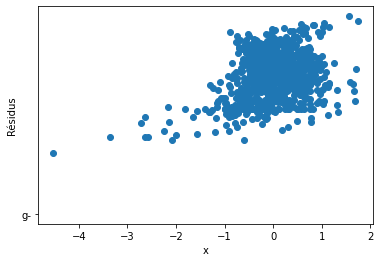

In [36]:
#On étudie les résidus (A REFAIRE)

plt.plot(dfm['Points_ISA'] - (results.params[0] + results.params[1]*dfm['Personnel médical'] + results.params[2]*dfm['Personnels de direction et administratifs'] + results.params[3]*dfm['Personnels des services de soins'] +
                                                 results.params[4]*dfm['Autre sans direction et administratif'] + results.params[5]*dfm['Capital_Lit_MCO'] + results.params[6]*dfm['Capital_tech'] + results.params[7]*dfm['Capital_tech x Capital_Lit_MCO'] +
                                                 results.params[8]*dfm['Personnels des services de soins x Capital_tech'] + results.params[9]*dfm['Personnels des services de soins x Capital_Lit_MCO'] + results.params[10]*dfm['Personnels des services de soins x Personnels de direction et administratifs'] + results.params[11]*dfm['Personnels des services de soins x Personnel médical'] +
                                                 results.params[12]*dfm['Personnels de direction et administratifs x Capital_tech'] + results.params[13]*dfm['Personnels de direction et administratifs x Capital_Lit_MCO'] + results.params[14]*dfm['Personnels de direction et administratifs x Personnel médical'] + results.params[15]*dfm['Personnel médical x Capital_tech'] +
                                                 results.params[16]*dfm['Personnel médical x Capital_Lit_MCO'] + results.params[17]*dfm['Capital_tech x Capital_tech'] + results.params[18]*dfm['Capital_Lit_MCO x Capital_Lit_MCO'] + results.params[19]*dfm['Personnel médical x Personnel médical'] +
                                                 results.params[20]*dfm['Personnels de direction et administratifs x Personnels de direction et administratifs'] + results.params[21]*dfm['Personnels des services de soins x Personnels des services de soins'] + results.params[22]*dfm['Autre sans direction et administratif x Autre sans direction et administratif'] + results.params[23]*dfm['Personnels des services de soins x Autre sans direction et administratif'] +
                                                 results.params[24]*dfm['Capital_tech x Autre sans direction et administratif'] + results.params[25]*dfm['Personnels de direction et administratifs x Autre sans direction et administratif'] + results.params[26]*dfm['Personnel médical x Autre sans direction et administratif'] + results.params[27]*dfm['Capital_Lit_MCO x Autre sans direction et administratif']),
                                                 dfm['Points_ISA'], 'o', "g-", label="residus")
plt.xlabel("x")
plt.ylabel("Résidus")
plt.show()

In [37]:
#On crée une dataframe pour calculer les élasticités de tous nos facteurs de production

df_el = pd.DataFrame()

df_el = df_el.assign(el_med = results.params[1] + results.params[11] * dfm['Personnels des services de soins']
+ results.params[14] * dfm['Personnels de direction et administratifs']
+ results.params[15] * dfm['Capital_tech']
+ results.params[16] * dfm['Capital_Lit_MCO']
+ results.params[19] * dfm['Personnel médical'] * 2
+ results.params[26] * dfm['Autre sans direction et administratif'])

df_el = df_el.assign(el_captech = results.params[6] + results.params[7] * dfm['Capital_Lit_MCO']
+ results.params[8] * dfm['Personnels des services de soins']
+ results.params[12] * dfm['Personnels de direction et administratifs']
+ results.params[15] * dfm['Personnel médical']
+ results.params[17] * dfm['Capital_tech']*2
+ results.params[24] * dfm['Autre sans direction et administratif'])

df_el = df_el.assign(el_adm = results.params[2] + results.params[10]*dfm['Personnels des services de soins'] + results.params[12]*dfm['Capital_tech']
+ results.params[13]*dfm['Capital_Lit_MCO']
+ results.params[14]*dfm['Personnel médical']
+ results.params[20]*dfm['Personnels de direction et administratifs'] *2
+ results.params[25]*dfm['Autre sans direction et administratif'])

df_el = df_el.assign(el_soins = results.params[3] + results.params[8]*dfm['Capital_tech']
+ results.params[9]*dfm['Capital_Lit_MCO']
+ results.params[10]*dfm['Personnels de direction et administratifs']
+ results.params[11]*dfm['Personnel médical']
+ results.params[21]*dfm['Personnels des services de soins']*2
+ results.params[23]*dfm['Autre sans direction et administratif'])

df_el = df_el.assign(el_lits = results.params[5] + results.params[7]*dfm['Capital_tech']
+ results.params[9]*dfm['Personnels des services de soins']
+ results.params[13]*dfm['Personnels de direction et administratifs']
+ results.params[16]*dfm['Personnel médical']
+ results.params[18]*dfm['Capital_Lit_MCO']*2
+ results.params[27]*dfm['Autre sans direction et administratif'])

df_el


,el_med,el_captech,el_adm,el_soins,el_lits
0,0.704132,0.281095,-0.207638,0.161512,-0.524083
1,0.654514,-0.002193,-0.428457,0.259799,0.506738
2,0.294009,0.119350,0.000230,-0.082497,0.749069
3,0.715679,-0.045673,-0.462829,0.074715,0.802318
4,0.427941,0.034908,-0.080056,-0.185986,1.030570
...,...,...,...,...,...
1145,0.491969,-0.000003,-0.001362,-0.217328,1.052639
1146,0.373287,0.078686,0.100440,-0.229368,0.899403
1147,0.485621,0.050559,0.080028,0.138809,0.474979
1148,0.407036,0.171043,-0.068030,-0.268608,0.706399


In [39]:
#Calcul des élasticités de substitution (définition de McFadden, 1963)

df_el = df_el.assign(es_med_captech = (df_el['el_med'] + df_el['el_captech']) / (df_el['el_med'] + df_el['el_captech']
                                                                        + 2*results.params[15]
                                                                        - 2*results.params[6]*df_el['el_captech']/df_el['el_med']
                                                                        - 2*results.params[1]*df_el['el_med']/df_el['el_captech']))

df_el = df_el.assign(es_med_lits = (df_el['el_med'] + df_el['el_lits']) / (df_el['el_med'] + df_el['el_lits']
                                                                        + 2*results.params[16]
                                                                        - 2*results.params[5]*df_el['el_lits']/df_el['el_med']
                                                                        - 2*results.params[1]*df_el['el_med']/df_el['el_lits']))

df_el = df_el.assign(es_med_soins = (df_el['el_med'] + df_el['el_soins']) / (df_el['el_med'] + df_el['el_soins']
                                                                        + 2*results.params[11]
                                                                        - 2*results.params[3]*df_el['el_soins']/df_el['el_med']
                                                                        - 2*results.params[1]*df_el['el_med']/df_el['el_soins']))

df_el = df_el.assign(es_med_adm = (df_el['el_med'] + df_el['el_adm']) / (df_el['el_med'] + df_el['el_adm']
                                                                        + 2*results.params[14]
                                                                        - 2*results.params[2]*df_el['el_adm']/df_el['el_med']
                                                                        - 2*results.params[1]*df_el['el_med']/df_el['el_adm']))

df_el = df_el.assign(es_adm_soins = (df_el['el_adm'] + df_el['el_soins']) / (df_el['el_soins'] + df_el['el_adm']
                                                                        + 2*results.params[10]
                                                                        - 2*results.params[3]*df_el['el_soins']/df_el['el_adm']
                                                                        - 2*results.params[2]*df_el['el_adm']/df_el['el_soins']))

df_el = df_el.assign(es_adm_captech = (df_el['el_adm'] + df_el['el_captech']) / (df_el['el_adm'] + df_el['el_captech']
                                                                        + 2*results.params[12]
                                                                        - 2*results.params[6]*df_el['el_captech']/df_el['el_adm']
                                                                        - 2*results.params[2]*df_el['el_adm']/df_el['el_captech']))

df_el = df_el.assign(es_adm_lits = (df_el['el_adm'] + df_el['el_lits']) / (df_el['el_adm'] + df_el['el_lits']
                                                                        + 2*results.params[13]
                                                                        - 2*results.params[5]*df_el['el_lits']/df_el['el_adm']
                                                                        - 2*results.params[2]*df_el['el_adm']/df_el['el_lits']))

df_el = df_el.assign(es_soins_captech = (df_el['el_soins'] + df_el['el_captech']) / (df_el['el_soins'] + df_el['el_captech']
                                                                        + 2*results.params[8]
                                                                        - 2*results.params[6]*df_el['el_captech']/df_el['el_soins']
                                                                        - 2*results.params[3]*df_el['el_soins']/df_el['el_captech']))

df_el = df_el.assign(es_soins_lits = (df_el['el_soins'] + df_el['el_lits']) / (df_el['el_soins'] + df_el['el_lits']
                                                                        + 2*results.params[9]
                                                                        - 2*results.params[5]*df_el['el_lits']/df_el['el_soins']
                                                                        - 2*results.params[3]*df_el['el_soins']/df_el['el_lits']))
df_el.mean()

el_med               0.481600
el_captech           0.036770
el_adm              -0.106133
el_soins             0.007405
el_lits              0.751911
es_med_captech      -0.043569
es_med_lits        -10.744635
es_med_soins        -0.126262
es_med_adm          -0.015795
es_adm_soins         0.455342
es_adm_captech      -0.641059
es_adm_lits         -1.973835
es_soins_captech    -2.253814
es_soins_lits       -0.893361
dtype: float64

Elasticité de substitution positive = substituts ; négative (surtout proche de 0) = compléments
% de changement dans le ratio d'utilisation suite à 1% de changement dans la ratio de la productivité marginale de chacun. 

In [42]:
dfm.columns

Index(['Capital_Examens_biologiques x Capital_Examens_biologiques',
       'Capital_Examens_biologiques x Capital_Bloc',
       'Capital_Examens_biologiques x Autre sans techniques et ouvriers',
       'Capital_Examens_biologiques x Autre sans direction et administratif',
       'Capital_Examens_biologiques x Autre sans internes',
       'Capital_imagerie x Capital_Examens_biologiques',
       'Capital_imagerie x Capital_imagerie',
       'Capital_imagerie x Capital_Bloc', 'Capital_imagerie x Capital_Lit_MCO',
       'Capital_imagerie x Autre sans techniques et ouvriers',
       ...
       'Dep Moyenne Salaires Prof Intermédiaire Horaires',
       'Dep Moyenne Salaires Employé Horaires',
       'Moyenne Revenus Fiscaux Départementaux', 'Bloc_politique',
       'Autre sans internes', 'Autre sans direction et administratif',
       'Autre sans techniques et ouvriers', 'Capital_tech', 'Médecins',
       'Autres_personnels_médicaux'],
      dtype='object', length=133)

In [52]:
X = dfm[['Personnel médical', 'Personnels techniques et ouvriers',
       'Personnels des services de soins', 'Autre sans techniques et ouvriers',
        'Capital_Lit_MCO', 'Capital_tech',
        'Capital_tech x Capital_Lit_MCO',
       'Personnels des services de soins x Capital_tech',
       'Personnels des services de soins x Capital_Lit_MCO',
       'Personnels techniques et ouvriers x Personnels des services de soins',
       'Personnels des services de soins x Personnel médical',
       'Personnels techniques et ouvriers x Capital_tech',
       'Personnels techniques et ouvriers x Capital_Lit_MCO',
       'Personnels techniques et ouvriers x Personnel médical',
       'Personnel médical x Capital_tech', 'Personnel médical x Capital_Lit_MCO',
        'Capital_tech x Capital_tech', 'Capital_Lit_MCO x Capital_Lit_MCO',
        'Personnel médical x Personnel médical', 
        'Personnels techniques et ouvriers x Personnels techniques et ouvriers',
        'Personnels des services de soins x Personnels des services de soins',
        'Autre sans techniques et ouvriers x Autre sans techniques et ouvriers',
        'Personnels des services de soins x Autre sans techniques et ouvriers',
        'Capital_tech x Autre sans techniques et ouvriers',
        'Personnels techniques et ouvriers x Autre sans techniques et ouvriers',
        'Personnel médical x Autre sans techniques et ouvriers',
        'Capital_Lit_MCO x Autre sans techniques et ouvriers']]

X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm['Points_ISA']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     367.0
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        15:27:01   Log-Likelihood:                -961.58
No. Observations:                1150   AIC:                             1979.
Df Residuals:                    1122   BIC:                             2120.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [53]:
#Calcul des élasticités :

df_el1 = pd.DataFrame()

df_el1 = df_el1.assign(el_med = results.params[1] + results.params[11] * dfm['Personnels des services de soins']
+ results.params[14] * dfm['Personnels techniques et ouvriers']
+ results.params[15] * dfm['Capital_tech']
+ results.params[16] * dfm['Capital_Lit_MCO']
+ results.params[19] * dfm['Personnel médical'] * 2
+ results.params[26] * dfm['Autre sans techniques et ouvriers'])

df_el1 = df_el1.assign(el_captech = results.params[6] + results.params[7] * dfm['Capital_Lit_MCO']
+ results.params[8] * dfm['Personnels des services de soins']
+ results.params[12] * dfm['Personnels techniques et ouvriers']
+ results.params[15] * dfm['Personnel médical']
+ results.params[17] * dfm['Capital_tech']*2
+ results.params[24] * dfm['Autre sans techniques et ouvriers'])

df_el1 = df_el1.assign(el_ouv = results.params[2] + results.params[10]*dfm['Personnels des services de soins'] + results.params[12]*dfm['Capital_tech']
+ results.params[13]*dfm['Capital_Lit_MCO']
+ results.params[14]*dfm['Personnel médical']
+ results.params[20]*dfm['Personnels techniques et ouvriers'] *2
+ results.params[25]*dfm['Autre sans techniques et ouvriers'])

df_el1 = df_el1.assign(el_soins = results.params[3] + results.params[8]*dfm['Capital_tech']
+ results.params[9]*dfm['Capital_Lit_MCO']
+ results.params[10]*dfm['Personnels techniques et ouvriers']
+ results.params[11]*dfm['Personnel médical']
+ results.params[21]*dfm['Personnels des services de soins']*2
+ results.params[23]*dfm['Autre sans techniques et ouvriers'])

df_el1 = df_el1.assign(el_lits = results.params[5] + results.params[7]*dfm['Capital_tech']
+ results.params[9]*dfm['Personnels des services de soins']
+ results.params[13]*dfm['Personnels techniques et ouvriers']
+ results.params[16]*dfm['Personnel médical']
+ results.params[18]*dfm['Capital_Lit_MCO']*2
+ results.params[27]*dfm['Autre sans techniques et ouvriers'])

df_el1.mean()

el_med        0.427164
el_captech    0.037650
el_ouv       -0.015761
el_soins     -0.057469
el_lits       0.745450
dtype: float64

In [56]:
#Calcul des élasticités de substitution (définition de McFadden, 1963)

df_el1 = df_el1.assign(es_med_captech = (df_el1['el_med'] + df_el1['el_captech']) / (df_el1['el_med'] + df_el1['el_captech']
                                                                        + 2*results.params[15]
                                                                        - 2*results.params[6]*df_el1['el_captech']/df_el1['el_med']
                                                                        - 2*results.params[1]*df_el1['el_med']/df_el1['el_captech']))

df_el1 = df_el1.assign(es_med_lits = (df_el1['el_med'] + df_el1['el_lits']) / (df_el1['el_med'] + df_el1['el_lits']
                                                                        + 2*results.params[16]
                                                                        - 2*results.params[5]*df_el1['el_lits']/df_el1['el_med']
                                                                        - 2*results.params[1]*df_el1['el_med']/df_el1['el_lits']))

df_el1 = df_el1.assign(es_med_soins = (df_el1['el_med'] + df_el1['el_soins']) / (df_el1['el_med'] + df_el1['el_soins']
                                                                        + 2*results.params[11]
                                                                        - 2*results.params[3]*df_el1['el_soins']/df_el1['el_med']
                                                                        - 2*results.params[1]*df_el1['el_med']/df_el1['el_soins']))

df_el1 = df_el1.assign(es_med_ouv = (df_el1['el_med'] + df_el1['el_ouv']) / (df_el1['el_med'] + df_el1['el_ouv']
                                                                        + 2*results.params[14]
                                                                        - 2*results.params[2]*df_el1['el_ouv']/df_el1['el_med']
                                                                        - 2*results.params[1]*df_el1['el_med']/df_el1['el_ouv']))

df_el1 = df_el1.assign(es_ouv_soins = (df_el1['el_ouv'] + df_el1['el_soins']) / (df_el1['el_soins'] + df_el1['el_ouv']
                                                                        + 2*results.params[10]
                                                                        - 2*results.params[3]*df_el1['el_soins']/df_el1['el_ouv']
                                                                        - 2*results.params[2]*df_el1['el_ouv']/df_el1['el_soins']))

df_el1 = df_el1.assign(es_ouv_captech = (df_el1['el_ouv'] + df_el1['el_captech']) / (df_el1['el_ouv'] + df_el1['el_captech']
                                                                        + 2*results.params[12]
                                                                        - 2*results.params[6]*df_el1['el_captech']/df_el1['el_ouv']
                                                                        - 2*results.params[2]*df_el1['el_ouv']/df_el1['el_captech']))

df_el1 = df_el1.assign(es_ouv_lits = (df_el1['el_ouv'] + df_el1['el_lits']) / (df_el1['el_ouv'] + df_el1['el_lits']
                                                                        + 2*results.params[13]
                                                                        - 2*results.params[5]*df_el1['el_lits']/df_el1['el_ouv']
                                                                        - 2*results.params[2]*df_el1['el_ouv']/df_el1['el_lits']))

df_el1 = df_el1.assign(es_soins_captech = (df_el1['el_soins'] + df_el1['el_captech']) / (df_el1['el_soins'] + df_el1['el_captech']
                                                                        + 2*results.params[8]
                                                                        - 2*results.params[6]*df_el1['el_captech']/df_el1['el_soins']
                                                                        - 2*results.params[3]*df_el1['el_soins']/df_el1['el_captech']))

df_el1 = df_el1.assign(es_soins_lits = (df_el1['el_soins'] + df_el1['el_lits']) / (df_el1['el_soins'] + df_el1['el_lits']
                                                                        + 2*results.params[9]
                                                                        - 2*results.params[5]*df_el1['el_lits']/df_el1['el_soins']
                                                                        - 2*results.params[3]*df_el1['el_soins']/df_el1['el_lits']))
df_el.mean()

el_med               0.481600
el_captech           0.036770
el_adm              -0.106133
el_soins             0.007405
el_lits              0.751911
es_med_captech      -0.043569
es_med_lits        -10.744635
es_med_soins        -0.126262
es_med_adm          -0.015795
es_adm_soins         0.455342
es_adm_captech      -0.641059
es_adm_lits         -1.973835
es_soins_captech    -2.253814
es_soins_lits       -0.893361
dtype: float64

In [63]:
X = dfm[['Personnel médical', 'Internes',
       'Personnels des services de soins', 'Autre sans internes',
        'Capital_Lit_MCO', 'Capital_tech',
        'Capital_tech x Capital_Lit_MCO',
       'Personnels des services de soins x Capital_tech',
       'Personnels des services de soins x Capital_Lit_MCO',
       'Personnels des services de soins x Internes',
       'Personnels des services de soins x Personnel médical',
       'Internes x Capital_tech',
       'Internes x Capital_Lit_MCO',
       'Personnel médical x Internes',
       'Personnel médical x Capital_tech', 'Personnel médical x Capital_Lit_MCO',
        'Capital_tech x Capital_tech', 'Capital_Lit_MCO x Capital_Lit_MCO',
        'Personnel médical x Personnel médical', 
        'Internes x Internes',
        'Personnels des services de soins x Personnels des services de soins',
        'Autre sans internes x Autre sans internes',
        'Personnels des services de soins x Autre sans internes',
        'Capital_tech x Autre sans internes',
        'Internes x Autre sans internes',
        'Personnel médical x Autre sans internes',
        'Capital_Lit_MCO x Autre sans internes']]

X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm['Points_ISA']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     379.6
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        15:44:22   Log-Likelihood:                -944.11
No. Observations:                1150   AIC:                             1944.
Df Residuals:                    1122   BIC:                             2086.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [66]:
#On crée une dataframe pour calculer les élasticités de tous nos facteurs de production

df_el2 = pd.DataFrame()

df_el2 = df_el2.assign(el_med = results.params[1] + results.params[11] * dfm['Personnels des services de soins']
+ results.params[14] * dfm['Internes']
+ results.params[15] * dfm['Capital_tech']
+ results.params[16] * dfm['Capital_Lit_MCO']
+ results.params[19] * dfm['Personnel médical'] * 2
+ results.params[26] * dfm['Autre sans internes'])

df_el2 = df_el2.assign(el_captech = results.params[6] + results.params[7] * dfm['Capital_Lit_MCO']
+ results.params[8] * dfm['Personnels des services de soins']
+ results.params[12] * dfm['Internes']
+ results.params[15] * dfm['Personnel médical']
+ results.params[17] * dfm['Capital_tech']*2
+ results.params[24] * dfm['Autre sans internes'])

df_el2 = df_el2.assign(el_int = results.params[2] + results.params[10]*dfm['Personnels des services de soins'] + results.params[12]*dfm['Capital_tech']
+ results.params[13]*dfm['Capital_Lit_MCO']
+ results.params[14]*dfm['Personnel médical']
+ results.params[20]*dfm['Internes'] *2
+ results.params[25]*dfm['Autre sans internes'])

df_el2 = df_el2.assign(el_soins = results.params[3] + results.params[8]*dfm['Capital_tech']
+ results.params[9]*dfm['Capital_Lit_MCO']
+ results.params[10]*dfm['Internes']
+ results.params[11]*dfm['Personnel médical']
+ results.params[21]*dfm['Personnels des services de soins']*2
+ results.params[23]*dfm['Autre sans internes'])

df_el2 = df_el2.assign(el_lits = results.params[5] + results.params[7]*dfm['Capital_tech']
+ results.params[9]*dfm['Personnels des services de soins']
+ results.params[13]*dfm['Internes']
+ results.params[16]*dfm['Personnel médical']
+ results.params[18]*dfm['Capital_Lit_MCO']*2
+ results.params[27]*dfm['Autre sans internes'])

df_el2.mean()

el_med        0.481104
el_captech    0.040560
el_int        0.041832
el_soins      0.004778
el_lits       0.719298
dtype: float64

In [67]:
#Calcul des élasticités de substitution (définition de McFadden, 1963)

df_el2 = df_el2.assign(es_med_captech = (df_el2['el_med'] + df_el2['el_captech']) / (df_el2['el_med'] + df_el2['el_captech']
                                                                        + 2*results.params[15]
                                                                        - 2*results.params[6]*df_el2['el_captech']/df_el2['el_med']
                                                                        - 2*results.params[1]*df_el2['el_med']/df_el2['el_captech']))

df_el2 = df_el2.assign(es_med_lits = (df_el2['el_med'] + df_el2['el_lits']) / (df_el2['el_med'] + df_el2['el_lits']
                                                                        + 2*results.params[16]
                                                                        - 2*results.params[5]*df_el2['el_lits']/df_el2['el_med']
                                                                        - 2*results.params[1]*df_el2['el_med']/df_el2['el_lits']))

df_el2 = df_el2.assign(es_med_soins = (df_el2['el_med'] + df_el2['el_soins']) / (df_el2['el_med'] + df_el2['el_soins']
                                                                        + 2*results.params[11]
                                                                        - 2*results.params[3]*df_el2['el_soins']/df_el2['el_med']
                                                                        - 2*results.params[1]*df_el2['el_med']/df_el2['el_soins']))

df_el2 = df_el2.assign(es_med_int = (df_el2['el_med'] + df_el2['el_int']) / (df_el2['el_med'] + df_el2['el_int']
                                                                        + 2*results.params[14]
                                                                        - 2*results.params[2]*df_el2['el_int']/df_el2['el_med']
                                                                        - 2*results.params[1]*df_el2['el_med']/df_el2['el_int']))

df_el2 = df_el2.assign(es_int_soins = (df_el2['el_int'] + df_el2['el_soins']) / (df_el2['el_soins'] + df_el2['el_int']
                                                                        + 2*results.params[10]
                                                                        - 2*results.params[3]*df_el2['el_soins']/df_el2['el_int']
                                                                        - 2*results.params[2]*df_el2['el_int']/df_el2['el_soins']))

df_el2 = df_el2.assign(es_int_captech = (df_el2['el_int'] + df_el2['el_captech']) / (df_el2['el_int'] + df_el2['el_captech']
                                                                        + 2*results.params[12]
                                                                        - 2*results.params[6]*df_el2['el_captech']/df_el2['el_int']
                                                                        - 2*results.params[2]*df_el2['el_int']/df_el2['el_captech']))

df_el2 = df_el2.assign(es_int_lits = (df_el2['el_int'] + df_el2['el_lits']) / (df_el2['el_int'] + df_el2['el_lits']
                                                                        + 2*results.params[13]
                                                                        - 2*results.params[5]*df_el2['el_lits']/df_el2['el_int']
                                                                        - 2*results.params[2]*df_el2['el_int']/df_el2['el_lits']))

df_el2 = df_el2.assign(es_soins_captech = (df_el2['el_soins'] + df_el2['el_captech']) / (df_el2['el_soins'] + df_el2['el_captech']
                                                                        + 2*results.params[8]
                                                                        - 2*results.params[6]*df_el2['el_captech']/df_el2['el_soins']
                                                                        - 2*results.params[3]*df_el2['el_soins']/df_el2['el_captech']))

df_el2 = df_el2.assign(es_soins_lits = (df_el2['el_soins'] + df_el2['el_lits']) / (df_el2['el_soins'] + df_el2['el_lits']
                                                                        + 2*results.params[9]
                                                                        - 2*results.params[5]*df_el2['el_lits']/df_el2['el_soins']
                                                                        - 2*results.params[3]*df_el2['el_soins']/df_el2['el_lits']))
df_el2.mean()

el_med              0.481104
el_captech          0.040560
el_int              0.041832
el_soins            0.004778
el_lits             0.719298
es_med_captech     -0.053220
es_med_lits         1.159186
es_med_soins        0.411435
es_med_int         -0.062170
es_int_soins        0.074443
es_int_captech     -0.023608
es_int_lits        -0.306037
es_soins_captech    0.073642
es_soins_lits       0.372881
dtype: float64

Brouillon

In [220]:
df2 = df.assign(infl_med_captech = (dfm['Points_ISA']/(dfm['Personnel médical']*dfm['Capital_tech'])) * (results.params[15]
            + (results.params[1] + results.params[11] * dfm['Personnels des services de soins']
                + results.params[14] * dfm['Personnels de direction et administratifs']
                + results.params[15] * dfm['Capital_tech']
                + results.params[16] * dfm['Capital_Lit_MCO']
                + results.params[19] * dfm['Personnel médical']
                + results.params[26] * dfm['Autre sans direction et administratif'])
                *(results.params[6] + results.params[7] * dfm['Capital_Lit_MCO']
                 + results.params[8] * dfm['Personnels des services de soins']
                  + results.params[12] * dfm['Personnels de direction et administratifs']
                  + results.params[15] * dfm['Personnel médical']
                  + results.params[17] * dfm['Capital_tech']
                  + results.params[24] * dfm['Autre sans direction et administratif']))     )

df2['infl_med_captech']

0            inf
1       0.002226
2      -0.169636
3      -0.001650
4       0.024291
          ...   
1145    0.010116
1146   -0.028245
1147    0.041596
1148   -0.058501
1149    0.002869
Name: infl_med_captech, Length: 1150, dtype: float64